In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv('Kenya Malaria_Prediction Dataset by who.csv')

df.head(20)

,Patient ID,Age,Gender,Region,Fever,Headache,Chills,Sweats,Fatigue,Hemoglobin (g/dL),Platelet (cells/μL),WBC (cells/μL),Parasite Detected,Diagnosis
0,1,52,Male,Rural,Yes,No,Yes,No,Yes,12.2,367281,10578,No,Negative
1,2,93,Male,Rural,Yes,Yes,No,Yes,Yes,11.5,261529,6367,Yes,Negative
2,3,15,Male,Rural,Yes,Yes,Yes,No,No,12.5,383009,11904,No,Negative
3,4,72,Female,Urban,Yes,No,Yes,No,No,12.7,245800,11793,No,Negative
4,5,61,Male,Rural,No,Yes,Yes,No,No,11.6,379350,10677,No,Negative
5,6,21,Male,Rural,Yes,Yes,No,No,Yes,12.7,152676,11466,No,Negative
6,7,83,Female,Rural,Yes,No,Yes,Yes,Yes,10.5,151215,10717,Yes,Negative
7,8,87,Male,Urban,Yes,No,No,Yes,Yes,11.2,299933,11861,No,Negative
8,9,75,Female,Urban,Yes,Yes,Yes,No,No,13.7,296932,4922,No,Negative
9,10,75,Female,Urban,Yes,Yes,Yes,No,Yes,10.9,217800,5820,Yes,Negative


In [3]:
#Checking null values
null_counts = df.isnull().sum()
print(null_counts)

Patient ID             0
Age                    0
Gender                 0
Region                 0
Fever                  0
Headache               0
Chills                 0
Sweats                 0
Fatigue                0
Hemoglobin (g/dL)      0
Platelet (cells/μL)    0
WBC (cells/μL)         0
Parasite Detected      0
Diagnosis              0
dtype: int64


In [4]:
df = pd.get_dummies(df, drop_first=True)  # Converts text columns to numeric
df.head(20)


,Patient ID,Age,Hemoglobin (g/dL),Platelet (cells/μL),WBC (cells/μL),Gender_Male,Region_Urban,Fever_Yes,Headache_Yes,Chills_Yes,Sweats_Yes,Fatigue_Yes,Parasite Detected_Yes,Diagnosis_Positive
0,1,52,12.2,367281,10578,True,False,True,False,True,False,True,False,False
1,2,93,11.5,261529,6367,True,False,True,True,False,True,True,True,False
2,3,15,12.5,383009,11904,True,False,True,True,True,False,False,False,False
3,4,72,12.7,245800,11793,False,True,True,False,True,False,False,False,False
4,5,61,11.6,379350,10677,True,False,False,True,True,False,False,False,False
5,6,21,12.7,152676,11466,True,False,True,True,False,False,True,False,False
6,7,83,10.5,151215,10717,False,False,True,False,True,True,True,True,False
7,8,87,11.2,299933,11861,True,True,True,False,False,True,True,False,False
8,9,75,13.7,296932,4922,False,True,True,True,True,False,False,False,False
9,10,75,10.9,217800,5820,False,True,True,True,True,False,True,True,False


In [5]:
X = df.drop("Diagnosis_Positive", axis=1)  # Features
y = df["Diagnosis_Positive"]               # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[803   1]
 [196   0]]
Classification Report:
               precision    recall  f1-score   support

       False       0.80      1.00      0.89       804
        True       0.00      0.00      0.00       196

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.45      1000
weighted avg       0.65      0.80      0.72      1000

Accuracy: 0.803


In [6]:
print(df["Diagnosis_Positive"].value_counts())

Diagnosis_Positive
False    4019
True      981
Name: count, dtype: int64


In [13]:
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression

# Create and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # adjust parameters as needed
rf. fit(X, y)  # X is your feature data, y is your target

# Now you can access feature importances
importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
# ... rest of your code

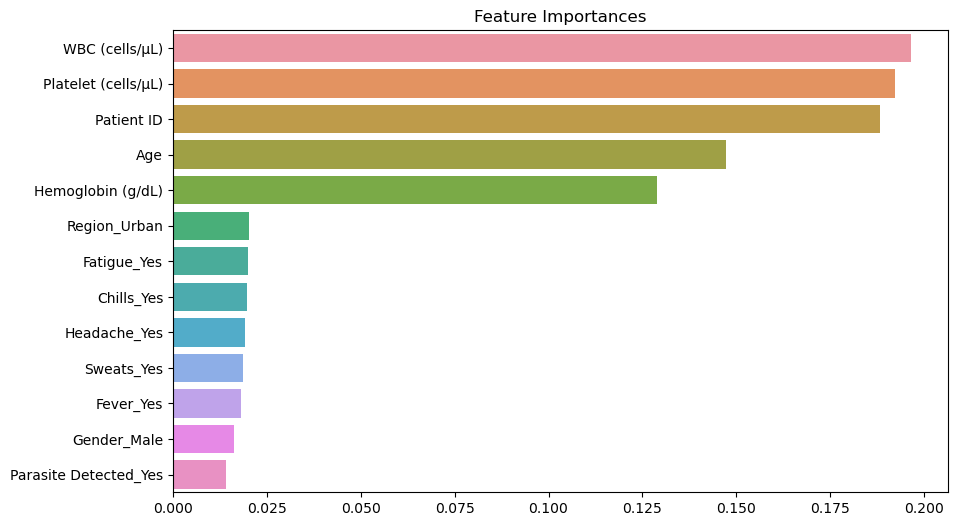

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances")
plt.show()

In [15]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata


In [17]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/cc/f5/1b5d88e5a65168b435e8339b53d027e3e7adecb0c7d157bc86d18f78471b/xgboost-3.0.2-py3-none-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for nvidia-nccl-cu12 from https://files.pythonhosted.org/packages/5c/5b/4e4fff7bad39adf89f735f2bc87248c81db71205b62bcc0d5ca5b606b3c3/nvidia_nccl_cu12-2.27.3-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 2.1 MB/s eta 0:00:00 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 2.1 MB/s eta 0:00:00 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = XGBClassifier(scale_pos_weight=4, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/home/c7bd4028-92d1-4976-9918-e98cd7478604/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [09:18:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.734
Confusion Matrix:
 [[706  98]
 [168  28]]
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.88      0.84       804
        True       0.22      0.14      0.17       196

    accuracy                           0.73      1000
   macro avg       0.52      0.51      0.51      1000
weighted avg       0.69      0.73      0.71      1000



In [19]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

xgb_model = XGBClassifier(
    scale_pos_weight=4,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

def print_metrics(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    print(f"\n{model_name} Metrics:")
    print("-" * 50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Print metrics for both models
print_metrics(rf_model, X_test_scaled, y_test, "Random Forest")
print_metrics(xgb_model, X_test_scaled, y_test, "XGBoost")


Random Forest Metrics:
--------------------------------------------------
Accuracy: 0.7810
Precision: 0.1515
Recall: 0.0255
F1-Score: 0.0437

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.97      0.88       804
        True       0.15      0.03      0.04       196

    accuracy                           0.78      1000
   macro avg       0.48      0.50      0.46      1000
weighted avg       0.67      0.78      0.71      1000


XGBoost Metrics:
--------------------------------------------------
Accuracy: 0.7340
Precision: 0.2222
Recall: 0.1429
F1-Score: 0.1739

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.88      0.84       804
        True       0.22      0.14      0.17       196

    accuracy                           0.73      1000
   macro avg       0.52      0.51      0.51      1000
weighted avg       0.69      0.73      0.71      1000



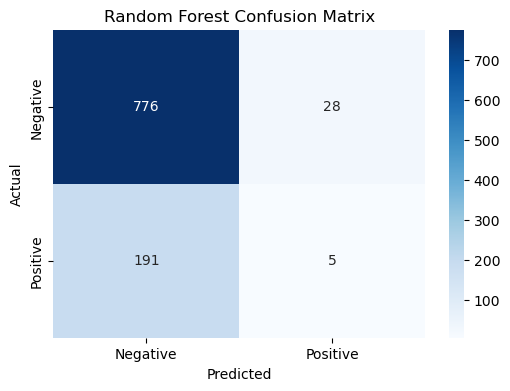

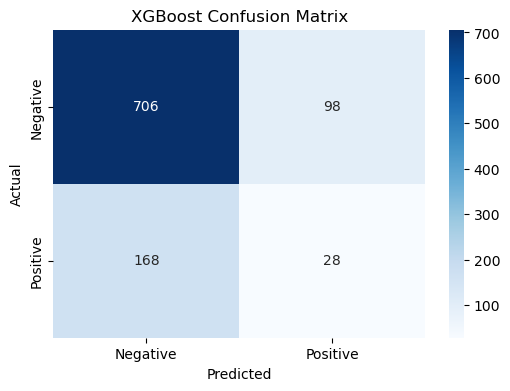

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(rf_model, X_test_scaled, y_test, "Random Forest")
plot_confusion_matrix(xgb_model, X_test_scaled, y_test, "XGBoost")

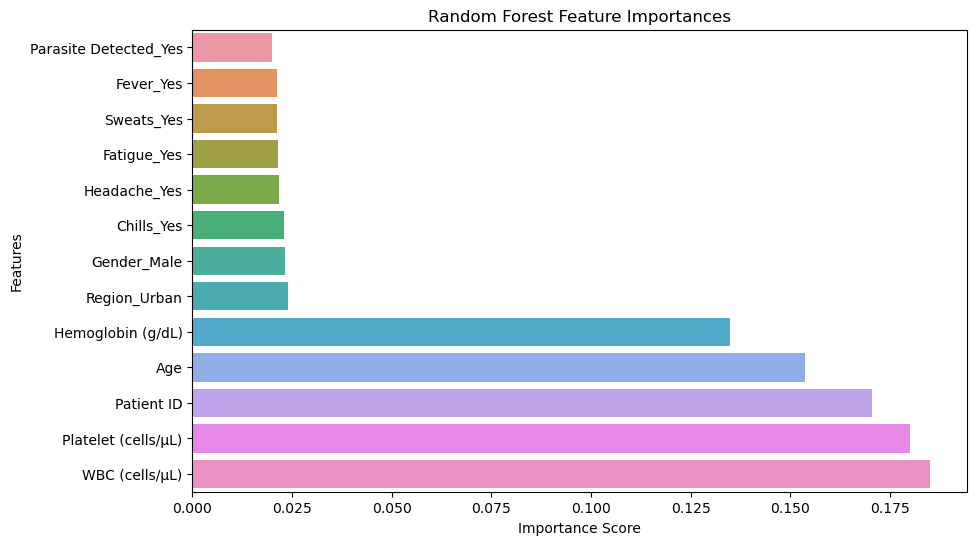

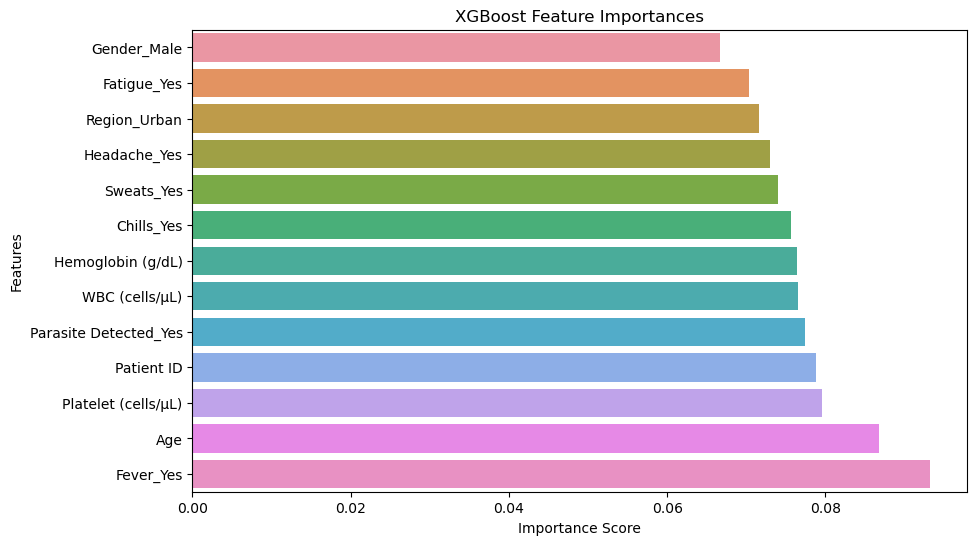

In [24]:
def plot_feature_importance(model, model_name):
    plt.figure(figsize=(10, 6))
    importances = model.feature_importances_
    features = X.columns
    
    # Sort features by importance
    sorted_idx = importances.argsort()
    
    sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
    plt.title(f'{model_name} Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

# Plot feature importances
plot_feature_importance(rf_model, "Random Forest")
plot_feature_importance(xgb_model, "XGBoost")